<p style="text-align: center; font-size:24px;"><b>Data Cleaning & Transformation</b></p>

A major part of data science is not building models but preparing data so that those models can work properly. In fact, most of the effort goes into cleaning and organizing raw information before any analysis takes place. Raw data often arrives messy, with inconsistencies and formats that make it hard to use directly. To make it usable, data scientists diagnose how “tidy” it is, reshape rows and columns so they line up with the questions being asked, and sometimes merge multiple sources together. They may need to correct value types, such as converting numbers that were stored as text, or handle gaps by dropping or filling missing entries. Another frequent task is manipulating strings to make the data more consistent and meaningful. All these steps are essential because clean, well-structured data is the foundation for reliable insights. Through practice on untidy datasets, one learns the key techniques that transform raw information into a state ready for exploration and analysis.


# Data Cleaning

In [38]:
import pandas as pd

## Diagnose the data
Tidy data is the standard we aim for when preparing information for analysis. In tidy form, every column represents one variable and every row represents one observation. This structure makes it easy to filter, aggregate, and visualize results. When data isn’t tidy, it often has values spread across columns or compressed into a single field, which makes analysis clumsy. For instance, a wide table with separate columns for “Checkings” and “Savings” balances is harder to work with than a long-form table where account type is a variable and each balance has its own row. By reshaping into the long form, you make the structure consistent and flexible.
Before reshaping or cleaning, the first step is diagnosing the state of your dataset. With pandas, you can quickly get a sense of its shape and issues: `.head()` shows the first rows to check for structure, `.info()` summarizes data types and missing values, `.describe()` provides statistical overviews, `.columns` lists the headers, and `.value_counts()` reveals unique values in a column. These functions help you detect untidy patterns, inconsistencies, or errors so you can plan the cleaning steps needed to transform the data into a tidy, usable format.

In [39]:
# Read the CSV files from the new path "datafolder/"
df1 = pd.read_csv("data_folder/df1.csv")   # Load df1.csv from the datafolder directory
df2 = pd.read_csv("data_folder/df2.csv")   # Load df2.csv from the datafolder directory

# Display the first 5 rows of each DataFrame
print(df1.head())  # Quick check of df1 structure
print(df2.head())  # Quick check of df2 structure

# Display info summary (columns, data types, non-null counts)
print(df1.info())  # Diagnose df1
print(df2.info())  # Diagnose df2

# Display descriptive statistics (mean, std, min, max, etc.)
print(df1.describe())  # Summary stats for df1
print(df2.describe())  # Summary stats for df2

# Display distinct rows and their frequencies
print(df1.value_counts())  # Value counts for unique rows in df1
print(df2.value_counts())  # Value counts for unique rows in df2

  Grocery Item  Cake Recipe  Pancake Recipe  Cookie Recipe
0         Eggs            2               3              1
1         Milk            1               2              1
2        Flour            2               1              2
  Grocery Item          Recipe  Number
0         Eggs     Cake Recipe       2
1         Milk     Cake Recipe       1
2        Flour     Cake Recipe       2
3         Eggs  Pancake Recipe       3
4         Milk  Pancake Recipe       2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Grocery Item    3 non-null      object
 1   Cake Recipe     3 non-null      int64 
 2   Pancake Recipe  3 non-null      int64 
 3   Cookie Recipe   3 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   C

## Dealing with multiples files
When working in real-world projects, data often comes split into many separate files that share the same structure. An efficient way to handle this situation is to combine them into a single dataset so that analysis can be done on the whole rather than on fragments. For example, imagine you have files named `file1.csv`, `file2.csv`, `file3.csv`, and so on. Rather than reading them one by one and joining them manually, you can use the `glob` library to automatically collect all the filenames that follow a certain pattern.
By writing `glob.glob("file*.csv")`, Python returns a list of all files in the directory whose names start with “file” and end in `.csv`. You can then loop over this list, use `pandas.read_csv()` to read each file into a DataFrame, and store each DataFrame in a list. Finally, `pd.concat()` merges all those DataFrames into a single table.
This approach means you don’t have to hard-code every filename; you just tell Python what the pattern looks like, and it handles the rest. The result is one combined DataFrame ready for cleaning, exploration, and analysis, no matter how many files you start with.

In [40]:
import pandas as pd      # pandas is used to work with tabular data
import glob              # glob is used to find filenames matching a pattern

# student_files is a list of all filenames that match "exams*.csv"
# Example: ["exams0.csv", "exams1.csv", ..., "exams9.csv"]
student_files = glob.glob("data_folder/exams*.csv")

# df_list is an empty Python list that will store multiple DataFrames
df_list = []

# Loop through each filename in student_files
for filename in student_files:
    # df is a pandas DataFrame created by reading the CSV file
    df = pd.read_csv(filename)
    # Append each DataFrame to df_list
    df_list.append(df)

# students is a single pandas DataFrame created by concatenating
# all the DataFrames stored inside df_list
students = pd.concat(df_list)

# Print the combined DataFrame
print(students)

# Print the number of rows (observations) in the combined DataFrame
print(len(students))

    id         full_name gender_age fractions probability       grade
0    0  Nikolia Rainsdon        F15       66%         74%  11th grade
1    1    Libbie MacIver        F15       71%         83%  10th grade
2    2    Caesar Arnison        M16       70%         78%  12th grade
3    3     Leanora Cowup        F15       72%         74%   9th grade
4    4     Leanora Cowup        F15       72%         74%   9th grade
..  ..               ...        ...       ...         ...         ...
95  95  Brig Meadowcroft        M16       84%         NaN  12th grade
96  96  Isidor Abrashkov        M14       83%         78%  11th grade
97  97      Siana McKune        F17       72%         76%  12th grade
98  98       Tuck Lyford        M17       73%         84%  11th grade
99  99       Janie Paris        F17       68%         82%  11th grade

[600 rows x 6 columns]
600


## Reshaping your Data
Reshaping data is often necessary to turn a dataset into tidy form, where every variable has its own column and every observation has its own row. A common issue is when different categories of the same variable are stored as separate columns. For instance, you might see account balances spread across “Checking” and “Savings” columns, which makes comparisons and aggregations awkward. The tidy version has a single “Account Type” column that indicates whether a row is a checking or savings balance, and a single “Amount” column that records the balance.
The tool for this transformation in pandas is `.melt()`. It “unpivots” wide data into long format. You specify which column(s) should remain fixed (`id_vars`), which columns you want to transform into variable/value pairs (`value_vars`), what to call the new variable column (`var_name`), and what to call the new values column (`value_name`). For example, calling `.melt()` on the account table with “Account” as the ID and “Checking” and “Savings” as the value variables produces a long table where each row is one balance, clearly identified by account number and account type.
This tidy structure is far more flexible. It makes it straightforward to group by account type, calculate totals, or merge with other datasets. After melting, it’s also common to rename the columns so they are descriptive, ensuring that the table is self-explanatory to anyone who uses it.


In [41]:
students = pd.read_csv("data_folder/students.csv")

# 1. Print the column names of the original students DataFrame
print(students.columns)   # This shows what columns exist before reshaping

# 2. Reshape the DataFrame with pd.melt()
# - Keep 'full_name', 'gender_age', and 'grade' as identifier columns
# - Melt the exam score columns: 'fractions' and 'probability'
# - Create a new column 'exam' that stores the exam type
# - Create a new column 'score' that stores the actual exam score
students = pd.melt(
    frame=students,
    id_vars=['full_name', 'gender_age', 'grade'],
    value_vars=['fractions', 'probability'],
    value_name='score',
    var_name='exam'
)
print("-----------------------------------------------------")
# 3. Print out the first rows to verify reshaping worked
print(students.head())
print("-----------------------------------------------------")
# 4. Print the new column names
print(students.columns)
print("-----------------------------------------------------")
# 5. Print the counts of each exam type
print(students['exam'].value_counts())


Index(['Unnamed: 0', 'full_name', 'gender_age', 'fractions', 'probability',
       'grade'],
      dtype='object')
-----------------------------------------------------
           full_name gender_age       grade       exam score
0     Moses Kirckman        M14  11th grade  fractions   69%
1    Timofei Strowan        M18  11th grade  fractions   63%
2       Silvain Poll        M18   9th grade  fractions   69%
3     Lezley Pinxton        M18  11th grade  fractions   NaN
4  Bernadene Saunper        F17  11th grade  fractions   72%
-----------------------------------------------------
Index(['full_name', 'gender_age', 'grade', 'exam', 'score'], dtype='object')
-----------------------------------------------------
exam
fractions      1000
probability    1000
Name: count, dtype: int64


## Dealing with Duplicates
Duplicates are a common issue in datasets, often caused by mistakes during data entry, collection, or saving. They can lead to misleading analyses if not handled properly. In pandas, you can detect duplicates with the `.duplicated()` method, which returns a series of Boolean values indicating whether each row is a repeat of a previous one. A row is considered a duplicate only if every value in that row matches another row exactly.
To clean the dataset, `.drop_duplicates()` removes all repeated rows, keeping only the first occurrence. For example, if two identical “apple” rows exist, one will be dropped while unique rows remain. However, rows that differ in even one column (like two “peach” entries with different prices) are treated as distinct and not removed.
You can also target duplicates in specific columns by using the `subset` parameter. Calling `.drop_duplicates(subset=["item"])` ensures only the first row for each item is kept, dropping any additional entries, even if other values differ. This is helpful when you know that duplicates in a certain variable (like “item”) don’t add useful information. On the other hand, you wouldn’t want to remove duplicates based on a column like “price,” because multiple items legitimately share the same price.
The key is to carefully decide which columns define uniqueness in your context. Used thoughtfully, `.duplicated()` and `.drop_duplicates()` ensure your data is clean, accurate, and reliable for analysis.

In [42]:
import pandas as pd

# Print the original DataFrame
print(students)

# 1. Create a Series showing which rows are duplicates
duplicates = students.duplicated()

# 2. Print counts of True/False → tells us how many rows are duplicates
print(duplicates.value_counts())

# 3. Drop duplicate rows and update the DataFrame
students = students.drop_duplicates()

# 4. Check again for duplicates after dropping
duplicates = students.duplicated()
print(duplicates.value_counts())


              full_name gender_age       grade         exam score
0        Moses Kirckman        M14  11th grade    fractions   69%
1       Timofei Strowan        M18  11th grade    fractions   63%
2          Silvain Poll        M18   9th grade    fractions   69%
3        Lezley Pinxton        M18  11th grade    fractions   NaN
4     Bernadene Saunper        F17  11th grade    fractions   72%
...                 ...        ...         ...          ...   ...
1995     Wilie Stillert        F14   9th grade  probability   69%
1996     Gertie Flicker        F15  11th grade  probability   86%
1997       Yettie Labes        F14  12th grade  probability   82%
1998     Lock McGuinley        M18  10th grade  probability   84%
1999       Bebe Lebbern        F15  12th grade  probability   91%

[2000 rows x 5 columns]
False    1976
True       24
Name: count, dtype: int64
False    1976
Name: count, dtype: int64


## Split Column values
Sometimes data columns contain multiple pieces of information bundled together, and we need to separate them into distinct variables to make the dataset tidy. A common case is when dates are stored as strings without delimiters, like “MMDDYYYY.” For example, “12241989” represents December 24, 1989. While this format is compact, it makes analysis harder because month, day, and year are not directly accessible.
When we know the exact structure of the string, pandas allows us to split it using string indexing. By slicing substrings with `.str`, we can create new columns. Taking the first two characters gives the month, the next two characters give the day, and the rest of the string provides the year. For instance, the value “10311966” becomes month = “10”, day = “31”, and year = “1966.”
This transformation turns one messy column into three clear variables that can be used separately in analysis or visualization. It also helps prepare the data for conversion into numeric or datetime formats later. Splitting by index is thus a quick and reliable technique whenever you have strings with a consistent fixed-length structure.

What .str does
- In pandas, a column of text values (strings) is stored as a Series.
- The .str accessor allows you to apply vectorized string operations directly to every element in the column.
- For example, .str[0] takes the first character of every string, .str[1:] takes the substring starting from the second character to the end.
- Without .str, you’d need to loop through each row manually, but .str applies the operation efficiently to the whole column.

In [43]:
# 1. Print the original DataFrame
print(students)

# Print column names to inspect structure
print(students.columns)

# 2. Inspect the first rows of the gender_age column
print(students["gender_age"].head())

# 3. Extract the first character as gender
students["gender"] = students.gender_age.str[0]

# 4. Extract the rest of the string as age
students["age"] = students.gender_age.str[1:]

# 5. Inspect the DataFrame after adding new columns
print(students.head())
print(students.columns)

# 6. Drop the old gender_age column by selecting only the needed columns
students = students[['full_name', 'grade', 'exam', 'score', 'gender', 'age']]
print(students.head())


              full_name gender_age       grade         exam score
0        Moses Kirckman        M14  11th grade    fractions   69%
1       Timofei Strowan        M18  11th grade    fractions   63%
2          Silvain Poll        M18   9th grade    fractions   69%
3        Lezley Pinxton        M18  11th grade    fractions   NaN
4     Bernadene Saunper        F17  11th grade    fractions   72%
...                 ...        ...         ...          ...   ...
1995     Wilie Stillert        F14   9th grade  probability   69%
1996     Gertie Flicker        F15  11th grade  probability   86%
1997       Yettie Labes        F14  12th grade  probability   82%
1998     Lock McGuinley        M18  10th grade  probability   84%
1999       Bebe Lebbern        F15  12th grade  probability   91%

[1976 rows x 5 columns]
Index(['full_name', 'gender_age', 'grade', 'exam', 'score'], dtype='object')
0    M14
1    M18
2    M18
3    M18
4    F17
Name: gender_age, dtype: object
           full_name gender_a

## Splitting Strings 2
Sometimes a single column contains more than one piece of information, and splitting by fixed positions won’t work if the parts have different lengths. In those cases, we can split by a specific character that separates the values. For example, if a column named type has entries like user_Kenya or admin_US, the underscore _ is the natural divider between user type and country.
With pandas, .str.split('_') separates each string into a list: everything before the underscore goes into the first position, and everything after goes into the second. By saving this intermediate result, we can then select the pieces we want. Using .str.get(0) picks the first part (e.g., user, admin), and .str.get(1) picks the second part (e.g., Kenya, US).
This process reshapes the dataset into a tidier form with two new columns, usertype and country, which makes it much easier to analyze patterns such as how many users come from each country or how behavior differs across roles.

In [44]:
# 1. Split the 'full_name' column into two parts wherever there is a space " "
name_split = students["full_name"].str.split(" ")

# 2. Take the first part (index 0) as the first name
students["first_name"] = name_split.str.get(0)

# 3. Take the second part (index 1) as the last name
students["last_name"] = name_split.str.get(1)

# 4. Print the first rows to check the new structure
print(students.head())

           full_name       grade       exam score gender age first_name  \
0     Moses Kirckman  11th grade  fractions   69%      M  14      Moses   
1    Timofei Strowan  11th grade  fractions   63%      M  18    Timofei   
2       Silvain Poll   9th grade  fractions   69%      M  18    Silvain   
3     Lezley Pinxton  11th grade  fractions   NaN      M  18     Lezley   
4  Bernadene Saunper  11th grade  fractions   72%      F  17  Bernadene   

  last_name  
0  Kirckman  
1   Strowan  
2      Poll  
3   Pinxton  
4   Saunper  


## Looking at Types
Every column in a pandas DataFrame has a data type, known as a **dtype**, and the dtype determines what kinds of operations are possible. Columns can be numeric (like `int` or `float`), boolean, dates or times (`datetime`, `timedelta`), categories, or generic objects (often strings). When data comes in from a CSV or other raw source, pandas may store some values as objects even if they look numeric, which can make analysis harder.

For example, if a column of prices is stored as strings like `"$3"`, the dtype will be `object`. That means you can’t directly calculate averages or plot trends because pandas treats the column as text rather than numbers. By contrast, a column of calorie counts stored as `int64` can be summed, averaged, or plotted without issue.

To check the types of all columns in your DataFrame, you use `.dtypes`. This returns a Series object listing the dtype of each column. For instance, in a table with fruit names, prices stored as strings, and calorie counts as integers, `.dtypes` would show `object` for the text columns and `int64` for the calorie column.

Knowing your dtypes is the first step in cleaning because it tells you which columns need conversion before analysis. The next steps often involve transforming object columns into numeric or datetime types so you can apply mathematical or time-based operations to them.


In [45]:
# 1. Inspect the data types of each column
print(students.dtypes)

# 2. Try to calculate the mean of the 'score' column
# This will cause an error if 'score' is stored as strings instead of numbers
print(students["score"].mean())

full_name     object
grade         object
exam          object
score         object
gender        object
age           object
first_name    object
last_name     object
dtype: object


TypeError: can only concatenate str (not "int") to str

# String Parsing
String parsing is an important step in cleaning data, especially when numbers are stored as text with extra characters that make them unusable for calculations. A common case is prices stored with dollar signs. While `"$3"` looks like a number, pandas reads it as a string because of the symbol, meaning you can’t average or compare values directly.
To fix this, you can use regular expressions with `.replace()` to strip out unwanted characters. For example, applying `.replace('[\$,]', '', regex=True)` to the price column removes dollar signs and commas, leaving only numeric characters in the strings. Once the column contains clean strings, you then use `pd.to_numeric()` to convert it into a numeric dtype, such as float.
After these steps, the column can be used for proper analysis: you can compute the mean price, sum totals, or make price comparisons between fruits. This transformation turns the dataset from something visually understandable but computationally awkward into a format that is both tidy and analytically useful.
By parsing strings like this, you turn inconsistent, text-based data into reliable numerical variables, a crucial step for accurate analysis and visualization.

In [46]:
# From object the score becomes float
print(students.dtypes) 

# 1. Remove the '%' signs from the score column using regex
students["score"] = students["score"].replace('[\%,]', '', regex=True)

# 2. Convert the cleaned score column from string (object) to numeric (int/float)
students["score"] = pd.to_numeric(students["score"])

# Check the result
print(students.dtypes)   # confirm 'score' is now numeric
print(students.head())   # preview the cleaned DataFrame


full_name     object
grade         object
exam          object
score         object
gender        object
age           object
first_name    object
last_name     object
dtype: object
full_name      object
grade          object
exam           object
score         float64
gender         object
age            object
first_name     object
last_name      object
dtype: object
           full_name       grade       exam  score gender age first_name  \
0     Moses Kirckman  11th grade  fractions   69.0      M  14      Moses   
1    Timofei Strowan  11th grade  fractions   63.0      M  18    Timofei   
2       Silvain Poll   9th grade  fractions   69.0      M  18    Silvain   
3     Lezley Pinxton  11th grade  fractions    NaN      M  18     Lezley   
4  Bernadene Saunper  11th grade  fractions   72.0      F  17  Bernadene   

  last_name  
0  Kirckman  
1   Strowan  
2      Poll  
3   Pinxton  
4   Saunper  


## More String Parsing
Sometimes the numbers we need for analysis are hidden inside longer text strings. For example, workout logs might store both the type of exercise and the number of repetitions in the same field: `"lunges - 30 reps"`. While this is easy for humans to read, it’s not structured enough for analysis. To make the data usable, we want to separate the exercise type from the number of reps.
With pandas, we can do this using `.str.split()` together with a regular expression. Splitting on the pattern `(\d+)` tells pandas to break the string wherever it finds digits, and because the digits are in parentheses, they are preserved as part of the result. Using `expand=True` creates a temporary DataFrame where the exercise description, number of reps, and leftover text like `"reps"` are split into separate columns.
Once we have this split DataFrame, we can assign the parts back to the original data. The middle column (the digits) becomes the `reps` column, and we convert it to numeric with `pd.to_numeric()` so we can calculate totals or averages. The first column (the exercise name) can be cleaned with `.replace('[\- ]', '', regex=True)` to remove stray hyphens or spaces, leaving just the exercise name.
The result is a tidy dataset where each row has separate, meaningful variables: `date`, `exercise`, and `reps`. Now we can easily track how many squats or lunges were done over time, compare exercises, and perform all kinds of analysis that would not be possible if everything remained trapped in a single string.

In [47]:
import pandas as pd

# 1) Prime 5 righe della colonna grade
print(students['grade'].head())

# 2) Estrai il numero con regex (più diretto di split)
students['grade'] = students['grade'].str.extract(r'(\d+)')

# 3) Tipi
print(students.dtypes)

# 4) Converti a numerico
students['grade'] = pd.to_numeric(students['grade'], errors='coerce')

# 5) Media
avg_grade = students['grade'].mean()
print(avg_grade)


0    11th grade
1    11th grade
2     9th grade
3    11th grade
4    11th grade
Name: grade, dtype: object
full_name      object
grade          object
exam           object
score         float64
gender         object
age            object
first_name     object
last_name      object
dtype: object
10.620445344129555


## Missing Values
Missing values are a routine problem in datasets and can occur for many reasons: incomplete data collection, errors in storage, or simple human mistakes. In pandas, these show up as `NaN` (Not a Number), which represents the absence of a value. While some calculations can ignore `NaN`s, others will fail or give misleading results unless the gaps are handled properly.
There are two main strategies to deal with missing values:

**1. Dropping rows with missing data.**
If you don’t want incomplete rows to affect your analysis, you can remove them using `.dropna()`. By default, this deletes any row containing a `NaN`. For more targeted cleaning, you can specify a `subset`, which only removes rows where certain columns are missing. For instance, dropping rows with `NaN` in `num_guests` keeps the rest of the table intact.

**2. Filling in missing data.**
Sometimes it’s more useful to replace missing values rather than delete them, especially if losing rows would throw away important information. The `.fillna()` method allows you to substitute `NaN`s with chosen values. A common practice is to fill with the mean of the column or another statistic, so the filled values are consistent with the data’s distribution. For example, filling a missing `bill` with the average bill and missing `num_guests` with the average number of guests preserves the dataset size while making it usable for analysis.

Choosing between dropping and filling depends on the context: dropping is safer when you want only complete records, while filling is helpful when you need to retain all rows but ensure the data is valid for calculations. Both are essential techniques for preparing clean, reliable datasets.

In [48]:
# 1. Get the mean of the score column before filling NaNs
score_mean = students["score"].mean()
print(score_mean)

77.69657422512235


# Feature Engineering
summary

## Numerical Transformation introduction
Numerical transformations are techniques used to adjust and re-express numerical features in a dataset so they can be more effectively used in analysis or machine learning models. Even though data may already be in numeric form, its raw scale, distribution, or range can make it harder for algorithms to compare values fairly or to learn meaningful patterns.

Some models, such as logistic regression and neural networks, are very sensitive to how numbers are scaled, while others, like decision trees, are less affected but can still benefit from cleaner inputs. Transformations also help in handling extreme outliers or skewed distributions, making results easier to interpret.

The most common types of numerical transformations include:

Centering: shifting the values so they are balanced around zero.

Standardization: scaling values to have a mean of 0 and standard deviation of 1.

Min–Max Scaling: compressing values into a fixed range, usually between 0 and 1.

Binning: grouping continuous numbers into intervals or categories.

Logarithmic Transformation: reducing skewness by compressing very large values.

These methods do not change the essence of the data but adjust its scale or distribution, making comparisons between features more meaningful and helping models perform better.

In [50]:
# Load the CSV file into a DataFrame called coffee
coffee = pd.read_csv("data_folder/starbucks_customers.csv")

# Print the list of column names to understand available features
print(coffee.columns)

# Print a summary of the dataset:
#   - number of rows and columns
#   - each column’s data type
#   - count of non-null values (helps detect missing data)
print(coffee.info())


Index(['spent', 'nearest_starbucks', 'age', 'rate_quality', 'rate_price',
       'rate_promo', 'ambiance', 'wifi', 'service', 'meetings_hangout'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   spent              122 non-null    int64
 1   nearest_starbucks  122 non-null    int64
 2   age                122 non-null    int64
 3   rate_quality       122 non-null    int64
 4   rate_price         122 non-null    int64
 5   rate_promo         122 non-null    int64
 6   ambiance           122 non-null    int64
 7   wifi               122 non-null    int64
 8   service            122 non-null    int64
 9   meetings_hangout   122 non-null    int64
dtypes: int64(10)
memory usage: 9.7 KB
None


## Centering your data

entering means subtracting the mean of a dataset from each individual data point so that the resulting distribution has a mean of zero. By doing this, we can better analyze how far each value lies above or below the average.

The example focuses on the nearest_starbucks feature:

First, calculate the mean distance.

Then subtract this mean from each distance value to create a centered version of the dataset.

Finally, visualize the result with a histogram, which shows the distribution now centered around 0.

This makes it easier to interpret the spread of the data, highlighting whether most customers live close to a Starbucks or much farther away.

The same technique can be applied to any numerical feature, such as customer age, to compare relative distances from the mean.

In [ ]:
# ======================
# 1. Select age feature
# ======================
ages = coffee["age"]

# ======================
# 2. Find min and max
# ======================
min_age = ages.min()
print("Minimum age:", min_age)

max_age = ages.max()
print("Maximum age:", max_age)

# ======================
# 3. Calculate spread
# ======================
difference = max_age - min_age
print("Range (max - min):", difference)

# ======================
# 4. Find the mean
# ======================
mean_age = ages.mean()
print("Mean age:", mean_age)

# ======================
# 5. Center data
# ======================
centered_ages = ages - mean_age
print(centered_ages.head())

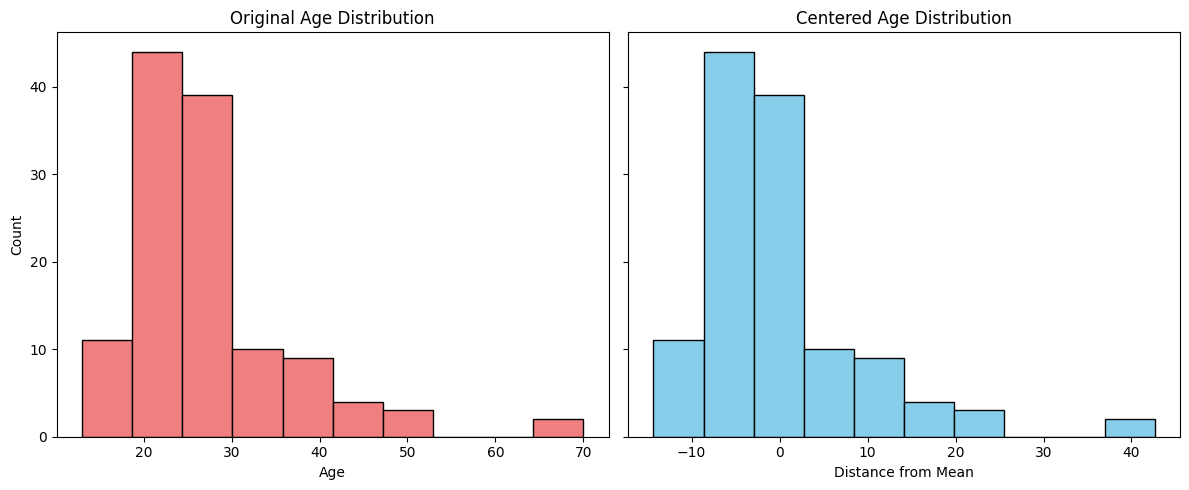

In [53]:
# Plot side by side histograms
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

# Original distribution
axes[0].hist(ages, bins=10, color="lightcoral", edgecolor="black")
axes[0].set_title("Original Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Centered distribution
axes[1].hist(centered_ages, bins=10, color="skyblue", edgecolor="black")
axes[1].set_title("Centered Age Distribution")
axes[1].set_xlabel("Distance from Mean")

plt.tight_layout()
plt.show()

📊 Markdown Explanation

The histogram shows the distribution of customer ages after centering. Each bar represents how many customers fall within a certain distance from the average age. Since we subtracted the mean, the center of the histogram is at 0, which corresponds to the average customer.

- If a bar is to the left of 0, it means those customers are younger than the average.
For example, if the mean age is ~35, and a bar is at -10, that represents customers around 25 years old.

- If a bar is to the right of 0, it means those customers are older than the average.
For example, if the mean age is ~35, and a bar is at +15, that represents customers around 50 years old.

By centering the data, we can easily compare how spread out the ages are relative to the mean, rather than working with raw values. This is especially useful when preparing data for machine learning models.

## Standardizing the Data
Instead of just subtracting the mean (centering), standardization also divides each data point by the standard deviation. This transformation results in a dataset with a mean of 0 and a standard deviation of 1.

Why is this important? Because many machine learning models treat all features equally, regardless of scale. If one feature is measured in large values (like income in dollars) and another in smaller values (like age in years), the larger-scaled feature could dominate the model. Standardization puts them on the same scale, making comparisons fairer and improving performance.

We especially want to standardize before:

Dimensionality reduction (e.g., PCA)

Distance-based algorithms (KMeans, KNN, DBSCAN)

Regularized models (LASSO, Ridge)

The formula is straightforward:
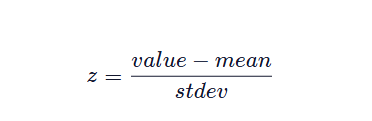

The lesson uses the nearest_starbucks feature to show this in practice:

Compute the mean and standard deviation.

Apply the formula to transform each value.

Verify the result has mean ~0 and std ~1.

Finally, the idea is extended to the age feature, allowing you to compare features on the same scale and reveal patterns that would otherwise be hidden.

👉 In short: standardization helps ensure all features contribute equally to machine learning models.

In [55]:
# Select the "age" column
ages = coffee['age']

# 1. Find the mean of ages
mean_age = np.mean(ages)   # average age across all customers

# 2. Find the standard deviation of ages
std_dev_age = np.std(ages) # measure of how spread out ages are

# 3. Standardize ages using the Z-score formula
ages_standardized = (ages - mean_age) / std_dev_age

# 4. Check the new distribution (should be mean ~ 0 and std ~ 1)
print("Standardized mean:", np.mean(ages_standardized))
print("Standardized std deviation:", np.std(ages_standardized))


Standardized mean: 1.7290358580227847e-16
Standardized std deviation: 0.9999999999999999


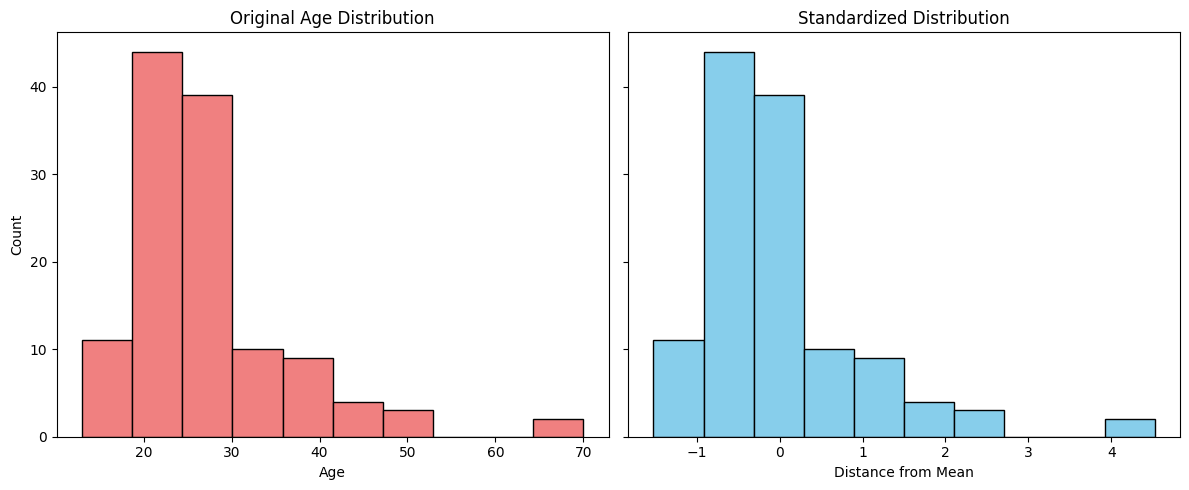

In [56]:
# Plot side by side histograms
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

# Original distribution
axes[0].hist(ages, bins=10, color="lightcoral", edgecolor="black")
axes[0].set_title("Original Age Distribution")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# Centered distribution
axes[1].hist(ages_standardized, bins=10, color="skyblue", edgecolor="black")
axes[1].set_title("Standardized Distribution")
axes[1].set_xlabel("Distance from Mean")

plt.tight_layout()
plt.show()

Standardization (Z-score normalization) does not change the shape of the distribution.
It only shifts and rescales the values so that:

the mean = 0

the standard deviation = 1

So if your original age distribution was skewed or not normally distributed, the standardized version will keep that skewness — just expressed in standardized units (e.g., “how many std deviations away from the mean”).

That’s why, for example:

If ages were right-skewed originally (say, more younger customers and fewer older ones), the standardized distribution will still be right-skewed.

Standardization is about comparability across features, not about making things Gaussian.

👉 If your goal was to make the data more normally distributed, you would need a different transformation (e.g., log-transform, Box-Cox, or Yeo-Johnson).

## Standardizing our Data with Sklearn

When working with real-world datasets, doing the math by hand to standardize features is a great way to understand what’s happening — subtracting the mean, dividing by the standard deviation, and getting values that sit on the same scale. But when you’re preparing data for machine learning, you’ll almost never do that manually. Instead, you can rely on tools like scikit-learn’s `StandardScaler`, which wraps all of that math into a clean, reusable workflow.

The only catch is that scikit-learn expects data in a specific format: a 2D array. That’s why we reshape our series into a single column with `.reshape(-1, 1)`. The `-1` tells NumPy to automatically figure out how many rows to create, while the `1` fixes the number of columns. Once reshaped, `StandardScaler` fits to the data and transforms it in one step, returning a scaled version where the mean is essentially zero and the standard deviation is one.

Those strange numbers written in exponential notation, like `-9.464196275493137e-17`, are nothing to worry about — they’re just the computer’s way of writing a value that is so close to zero it might as well be zero. The outcome is the same: your features are standardized, which means models like logistic regression, KNN, or clustering algorithms won’t be biased by different scales in the data.

Would you like me to expand this into a teaching-style notebook cell where I show the manual standardization of a feature next to the scikit-learn version, so you can literally see they give the same result?


In [57]:
# Import the scaler from scikit-learn
from sklearn.preprocessing import StandardScaler  

# Select the ages feature
ages = coffee['age']

# 1. Instantiate the StandardScaler
scaler = StandardScaler()

# 2. Reshape ages into a 2D array (required by scikit-learn)
ages_reshaped = np.array(ages).reshape(-1,1)

# Print the shape of the original and reshaped arrays
print("Original ages shape:", ages.shape)          # This is a 1D Series
print("Reshaped ages shape:", ages_reshaped.shape) # Now 2D, with one column

# 3. Standardize the data with fit_transform
ages_scaled = scaler.fit_transform(ages_reshaped)

# 4. Print mean and std of the scaled data
print("Mean of scaled ages:", np.mean(ages_scaled))   # Should be ~0
print("Std of scaled ages:", np.std(ages_scaled))     # Should be ~1


Original ages shape: (122,)
Reshaped ages shape: (122, 1)
Mean of scaled ages: 1.7290358580227847e-16
Std of scaled ages: 0.9999999999999999


📝 Explanation (Markdown)

We reshape the ages feature because scikit-learn expects a 2D array as input, where rows represent samples and columns represent features.
The command .reshape(-1, 1) tells NumPy to automatically figure out the correct number of rows (-1) and set exactly one column (1).

- The original ages shape shows that the data is a 1D Series.

- The reshaped ages shape confirms that it is now 2D, ready for scaling.

- The mean of scaled ages comes out very close to 0, which is the goal of standardization.

- The standard deviation of scaled ages comes out very close to 1, ensuring all values are on the same scale.

👉 Standardization ensures that features with different original units (like age in years vs. distance in miles) can be compared fairly by models that are sensitive to scale.

## Min-Max Normalizer
Min-max normalization is another way to rescale numerical data so that all values fall neatly between 0 and 1. Instead of centering or adjusting by the standard deviation, we look at the minimum and maximum values in a feature: the smallest becomes 0, the largest becomes 1, and everything else is linearly scaled in between.

The formula looks like this:

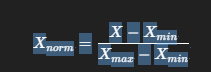

This approach is useful when your data has a consistent range without extreme outliers. Unlike standardization, which produces values centered around zero with a standard deviation of one, min-max normalization preserves the relative distances between points but compresses them into a bounded scale.

For example, if we take the distance to the nearest Starbucks feature from the dataset, min-max normalization will make the closest customer equal to 0 and the farthest equal to 1. Everyone else’s distance is expressed as a fraction between them: someone halfway in the range becomes 0.5, someone at three-quarters of the way becomes 0.75, and so on.

The result is a clean, comparable range that can be especially helpful when feeding data into machine learning models that are sensitive to input magnitudes, such as neural networks or KNN.

👉 The only drawback is that if your dataset has extreme outliers, the compression effect can squash most of your values into a very small portion of the 0–1 interval, making the transformation less meaningful. Would you like me to show you the code implementation for the ages column with a plot comparing before and after normalization?

In [58]:
# ======================
# Min-Max Normalization on "spent"
# ======================

# 1) Extract the "spent" feature
spent = coffee["spent"]

# 2) Find max and min values of "spent"
max_spent = np.max(spent)
min_spent = np.min(spent)

# 3) Find the range of values (spread between max and min)
spent_range = max_spent - min_spent
print("Range of spent values:", spent_range)

# 4) Normalize values using min-max formula
spent_normalized = (spent - min_spent) / spent_range

# 5) Print transformed values
print("\nNormalized spent values (first 10):")
print(spent_normalized.head(10))

Range of spent values: 28

Normalized spent values (first 10):
0    0.464286
1    0.892857
2    0.357143
3    0.250000
4    0.357143
5    0.392857
6    0.750000
7    0.535714
8    0.000000
9    0.250000
Name: spent, dtype: float64


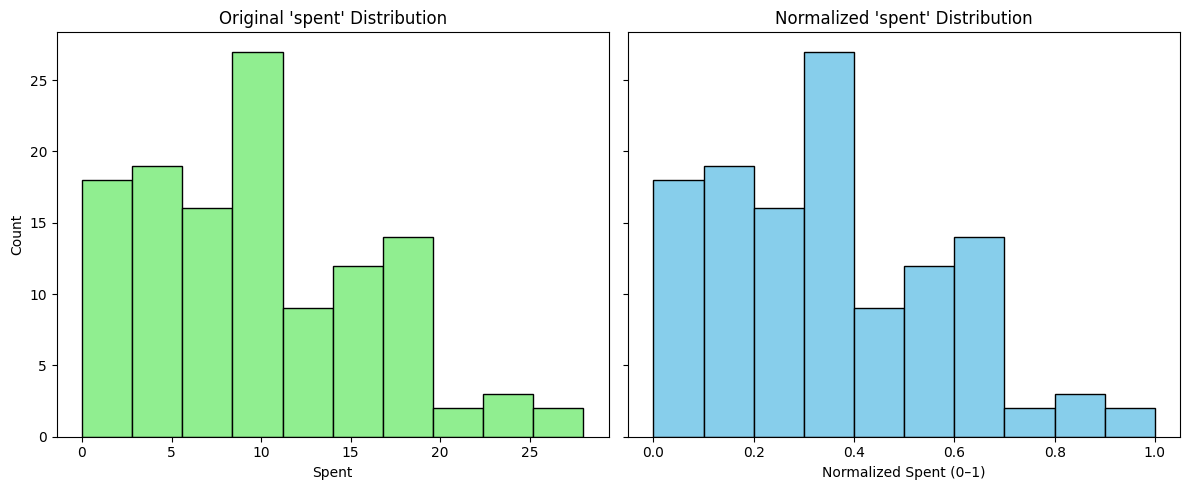

In [59]:
# ======================
# Visualize original vs normalized
# ======================
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

# Original distribution
axes[0].hist(spent, bins=10, color="lightgreen", edgecolor="black")
axes[0].set_title("Original 'spent' Distribution")
axes[0].set_xlabel("Spent")
axes[0].set_ylabel("Count")

# Normalized distribution
axes[1].hist(spent_normalized, bins=10, color="skyblue", edgecolor="black")
axes[1].set_title("Normalized 'spent' Distribution")
axes[1].set_xlabel("Normalized Spent (0–1)")

plt.tight_layout()
plt.show()

What happened here?

By applying min-max normalization to the spent feature, we transformed all values into a scale between 0 and 1. The customer who spent the least amount now corresponds to 0, while the one who spent the most corresponds to 1. All other spending amounts are expressed proportionally within this interval.

The left histogram shows the original spending distribution, which might have a wide range of values. The right histogram shows the normalized version, where the overall shape of the distribution is preserved, but the scale has been rescaled to a common 0–1 range.

This makes the feature directly comparable with others, which is especially important when using machine learning models that are sensitive to feature magnitudes (like neural networks or distance-based models).

In [62]:
# =====================================
# Min-Max Normalization with Sklearn
# =====================================

# Take the "spent" feature
spent = coffee['spent']

# Step 1: Reshape the array into 2D for sklearn
spent_reshaped = np.array(spent).reshape(-1, 1)

# Step 2: Instantiate MinMaxScaler
mmscaler = MinMaxScaler()

# Step 3: Perform fit_transform to scale the feature
reshaped_scaled = mmscaler.fit_transform(spent_reshaped)

# Step 4: Print min and max of the scaled data with explanations
print("Minimum of reshaped_scaled (should be 0):", np.min(reshaped_scaled))
print("Maximum of reshaped_scaled (should be 1):", np.max(reshaped_scaled))

Minimum of reshaped_scaled (should be 0): 0.0
Maximum of reshaped_scaled (should be 1): 1.0


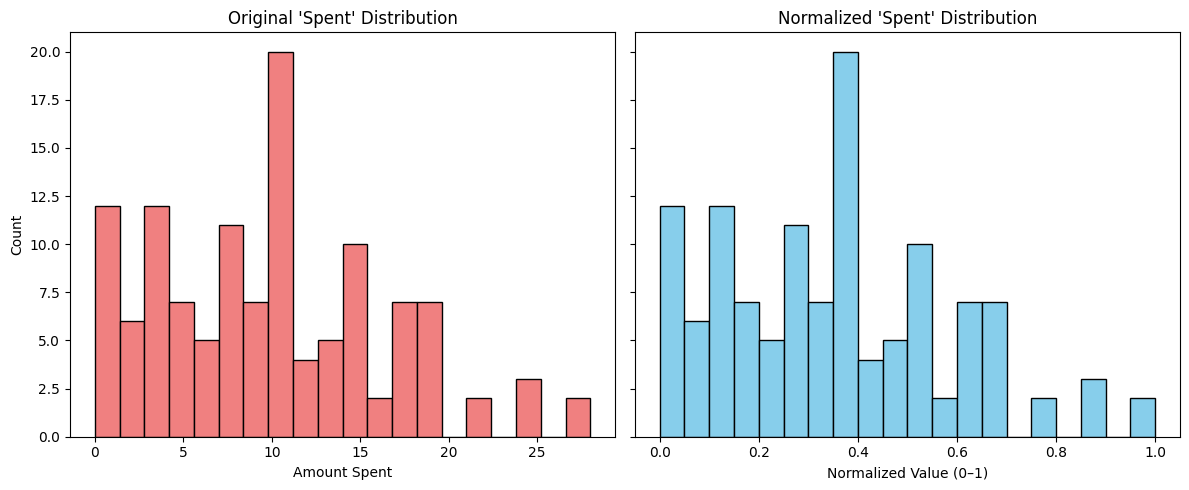

In [63]:
# Visualization: compare original and normalized distributions side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Original distribution
axes[0].hist(spent, bins=20, color="lightcoral", edgecolor="black")
axes[0].set_title("Original 'Spent' Distribution")
axes[0].set_xlabel("Amount Spent")
axes[0].set_ylabel("Count")

# Normalized distribution
axes[1].hist(reshaped_scaled, bins=20, color="skyblue", edgecolor="black")
axes[1].set_title("Normalized 'Spent' Distribution")
axes[1].set_xlabel("Normalized Value (0–1)")

plt.tight_layout()
plt.show()

📘 Explanation

Here we applied Min-Max Normalization to the spent feature using sklearn. The original distribution of spending values is scaled down so the lowest spending maps to 0 and the highest to 1.

As the prints confirm:

- np.min(reshaped_scaled) → gives the minimum of the scaled array (0)

- np.max(reshaped_scaled) → gives the maximum of the scaled array (1)

The shape of the histogram doesn’t change—it still reflects the same spending behavior among customers—but the scale has been compressed to a fixed range [0,1]. This makes it much easier to compare this feature with others that might have different numeric ranges.

## Binning your Data
Binning is all about grouping continuous data into **intervals (bins)** so we can simplify patterns and make distributions easier to interpret.

In this lesson, the example used the **distance to the nearest Starbucks** and grouped customers into ranges like “less than 1 km,” “1–3 km,” “3–5 km,” and “more than 5 km.”

The trick here is with `pd.cut()`:

* It includes the **lower bound** of the bin but **excludes the upper bound**.
* That’s why we define bins as `[0, 1, 3, 5, 8.1]` instead of ending at 8 — so customers reporting exactly 8 km still get included in the last group.

After creating the binned column, we can count how many customers fall into each range and visualize it with a bar chart.

The same approach can be applied to other features, like **age**, to group customers into categories (e.g., young adults, middle-aged, seniors) instead of treating every single numeric value separately.

👉 The key trade-off is:

* **Too few bins** → you might hide important patterns.
* **Too many bins** → you might keep too much noise and lose clarity.

Would you like me to suggest **sensible bin ranges for the age feature** (like decades: 18–25, 26–35, etc.), or should I stick strictly to evenly sized intervals?


Minimum age in dataset: 13
Maximum age in dataset: 70

First 10 rows of binned_ages:
0    [40, 71)
1    [30, 40)
2    [20, 30)
3    [20, 30)
4    [20, 30)
5    [20, 30)
6    [20, 30)
7    [20, 30)
8    [20, 30)
9    [20, 30)
Name: binned_ages, dtype: category
Categories (4, interval[int64, left]): [[12, 20) < [20, 30) < [30, 40) < [40, 71)]


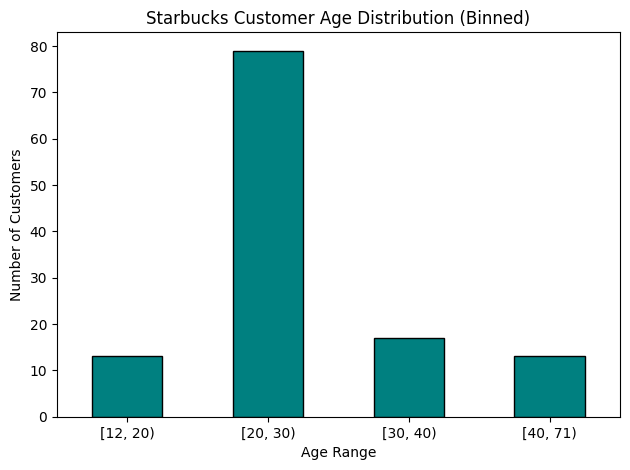

In [65]:
# ===========================
# 1) Print min and max ages
# ===========================
ages = coffee['age']
print("Minimum age in dataset:", np.min(ages))
print("Maximum age in dataset:", np.max(ages))

# ===========================
# 2) Define bin boundaries
# ===========================
age_bins = [12, 20, 30, 40, 71]

# ===========================
# 3) Create binned column
# ===========================
coffee["binned_ages"] = pd.cut(coffee['age'], age_bins, right=False)

# ===========================
# 4) Preview first 10 rows
# ===========================
print("\nFirst 10 rows of binned_ages:")
print(coffee["binned_ages"].head(10))

# ===========================
# 5) Plot bar chart of bins
# ===========================
coffee['binned_ages'].value_counts().sort_index().plot(kind='bar', color='teal', edgecolor='black')

plt.title('Starbucks Customer Age Distribution (Binned)')
plt.xlabel('Age Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  # Keep age bins horizontal
plt.tight_layout()
plt.show()


## Natural Log Transformation

Natural log transformations are an incredibly useful tool when working with skewed data, especially when we want to bring extreme values closer together.

The key idea is that when we take the natural log of each value in a dataset, we compress large values more than small ones. This makes highly skewed distributions—like odometer readings for cars, where most cars have low mileage but a few have extremely high mileage—look closer to a normal (bell-shaped) distribution.

For instance, without transformation, a car with 10,000 miles and one with 150,000 miles look drastically different. But after applying the natural log, their values become much closer (9.22 vs 11.93). The difference is now easier for machine learning models to handle, since the scale of the data has been compressed.

However, this technique has some caveats:

- You cannot apply log transformations to negative or zero values, since the natural log is undefined for those.

- It is best suited for right-skewed data (many small values, few very large values).

- If the data is left-skewed or non-parametric, other transformations like squaring, cubing, or Box-Cox may be more appropriate.

In short, log transformations are a way to stabilize variance, reduce skewness, and make features more model-friendly. But they need to be applied thoughtfully, depending on the nature of the dataset.

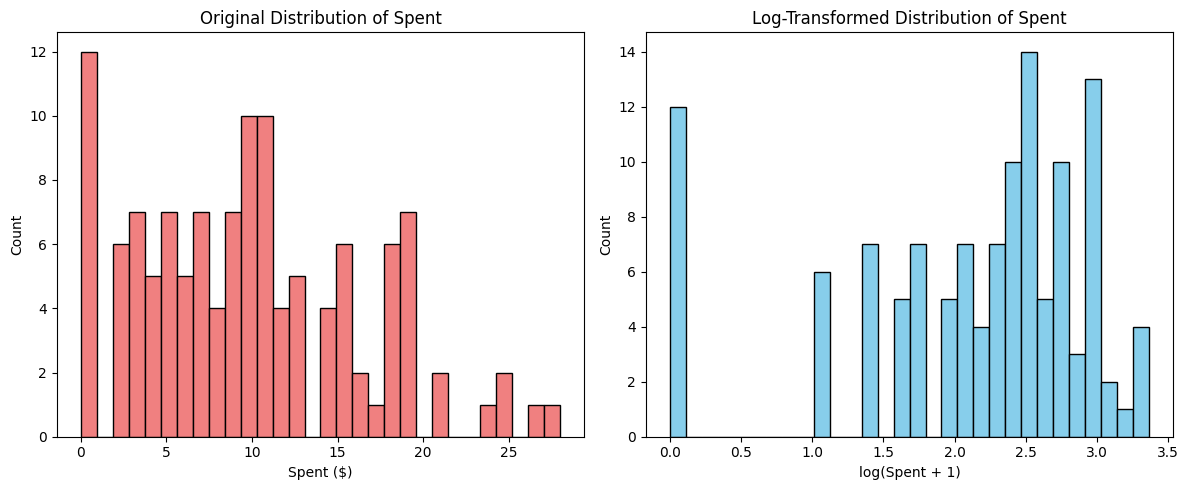

Original mean: 9.770491803278688
Original std dev: 6.590836765261772
Log-transformed mean: 2.0954010199119812
Log-transformed std dev: 0.8792331700249331


In [67]:
# Select the "spent" feature we want to transform
spent = coffee["spent"]

# ----------------------
# Step 1: Plot the original distribution
# ----------------------
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.hist(spent, bins=30, color="lightcoral", edgecolor="black")
plt.title("Original Distribution of Spent")
plt.xlabel("Spent ($)")
plt.ylabel("Count")

# ----------------------
# Step 2: Apply natural log transformation
#    - np.log compresses the scale
#    - Add 1 to avoid log(0) issues if zeros exist
# ----------------------
spent_logged = np.log(spent + 1)

# ----------------------
# Step 3: Plot the transformed distribution
# ----------------------
plt.subplot(1, 2, 2)
plt.hist(spent_logged, bins=30, color="skyblue", edgecolor="black")
plt.title("Log-Transformed Distribution of Spent")
plt.xlabel("log(Spent + 1)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# ----------------------
# Step 4: Quick check of summary statistics
# ----------------------
print("Original mean:", np.mean(spent))
print("Original std dev:", np.std(spent))
print("Log-transformed mean:", np.mean(spent_logged))
print("Log-transformed std dev:", np.std(spent_logged))


# EncodingCategorical Data

Categorical data comes in two forms: nominal (no natural order, like car colors) and ordinal (ordered categories, like condition ratings). Many machine learning algorithms can’t handle text, so categorical features must be encoded into numbers.

In the used car dataset, the condition column is ordinal. Values like Excellent, New, Like New, Good, Fair clearly follow a hierarchy from best to worst condition. To prepare this feature for modeling, we can:

1. Map labels manually using a dictionary (e.g., "Excellent" → 5, "Fair" → 1).

2. Use scikit-learn’s OrdinalEncoder, where we specify the category order and transform text into numeric values automatically.

This ensures the dataset is machine-readable and preserves the order of conditions, which is crucial for training models that rely on numerical input.

In [68]:
# Load dataset
cars = pd.read_csv('data_folder/cars.csv')

# Check variable types — this shows us which columns are categorical (dtype = object)
print(cars.dtypes)

Unnamed: 0        int64
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
Unnamed: 16     float64
dtype: object


In [69]:
# ======================
# Ordinal Encoding (Manual with Dictionary)
# ======================

# Inspect the distribution of the 'condition' column
print(cars['condition'].value_counts())

# Define hierarchy: Excellent > New > Like New > Good > Fair
rating_dict = {'Excellent':5, 'New':4, 'Like New':3, 'Good':2, 'Fair':1}

# Map each label to its numeric score and create a new column
cars['condition_rating'] = cars['condition'].map(rating_dict)

condition
1.9    732
3.5    507
4.3    475
4.4    468
4.1    460
3.7    446
3.6    422
4.2    404
2.0    376
4.0    370
2.9    357
3.9    351
2.8    338
2.7    303
3.4    303
3.8    297
2.6    225
4.9    224
4.6    220
4.8    220
4.5    219
2.5    203
3.3    199
3.0    197
4.7    191
5.0    186
3.2    179
2.4    175
2.1    162
3.1    156
2.3    154
1.0    127
2.2    110
1.8      8
1.7      5
1.3      3
1.4      2
1.6      1
1.5      1
1.1      1
Name: count, dtype: int64


In [70]:
# ======================
# Ordinal Encoding (Scikit-learn)
# ======================
from sklearn.preprocessing import OrdinalEncoder

# Create encoder with the defined order of categories
encoder = OrdinalEncoder(categories=[['Excellent', 'New', 'Like New', 'Good', 'Fair']])

# Reshape the feature into a 2D array as required by sklearn
condition_reshaped = cars['condition'].values.reshape(-1,1)

# Apply transformation and assign to new column
cars['condition_rating'] = encoder.fit_transform(condition_reshaped)

ValueError: could not convert string to float: 'Excellent'